<a href="https://colab.research.google.com/github/jaideep6214/House-Price-Prediction-using-Linear-Regression/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Step-1: Importing all Libraries

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt
import seaborn as sns

# Step-2: Loading Dataset

In [82]:
df=pd.read_csv("/content/gdrive/My Drive/ML Projects/Linear Regression/data.csv")

# Step-3:Exploring Dataset

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
df.shape  # We have 4600 rows and 18 Columns

(4600, 18)

In [10]:
df.columns  #Column names

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [11]:
df.index  #Row names from 0 to 4599

RangeIndex(start=0, stop=4600, step=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# Step-4:AIM-Predict Price of the House

### Dependent Variable = Price and Independent Variable are rest of the columns

In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# STEP-5: Data Pre-Processing

## 1: Data Cleaning

### (a): Removing Unwanted Observation

In [14]:
df.isnull().any() # No null values

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
street           False
city             False
statezip         False
country          False
dtype: bool

In [15]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [16]:
df.head(2) # Here Date,country are irrelevent
#in place of street,city we have statezip

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [17]:
df["country"].unique()

array(['USA'], dtype=object)

In [18]:
df.drop(['date',"country",'street',"city"], axis = 1, inplace = True)

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


### (b):Missing Data Handling

In [20]:
# There is no missing data

### (c): Outlier Management of each variable

In [21]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


### Price

In [22]:
df["price"].describe()  # Minimum price is 0

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [23]:
print(df[df["price"]==0].shape)  #49 Homes having price 0
df[df["price"]==0].head()

(49, 14)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,WA 98001
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,WA 98199
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,WA 98146
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,WA 98075
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,WA 98166


In [24]:
df[df["price"]==0].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.0,3.979592,2.698980,2787.142857,16453.306122,1.500000,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286
std,0.0,1.108486,1.194584,1354.375625,27739.227932,0.520416,0.242226,1.485760,0.826331,1337.148708,612.726149,27.247964,988.903054
min,0.0,1.000000,1.000000,720.000000,3500.000000,1.000000,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000
25%,0.0,3.000000,2.000000,1910.000000,6863.000000,1.000000,0.000000,0.000000,3.000000,1310.000000,0.000000,1952.000000,0.000000
50%,0.0,4.000000,2.500000,2600.000000,9000.000000,1.500000,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000
75%,0.0,5.000000,3.500000,3500.000000,13783.000000,2.000000,0.000000,0.000000,4.000000,3020.000000,900.000000,1998.000000,1999.000000
max,0.0,6.000000,6.250000,8020.000000,188200.000000,3.000000,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000


In [25]:
df["price"].mean()  # We will not take this

551962.9884732141

In [26]:
outlier_df = df[(df.bedrooms >= 1)&(df.bedrooms <= 6) & (df.bathrooms > 1) & (df.bathrooms <=6.25) & (df.sqft_living >= 720) & (df.sqft_living <= 8020)& (df.sqft_lot >= 3500) & (df.sqft_lot <= 188200) & (df.floors >= 1) & (df.floors <= 3) & (df.yr_built >= 1920) &(df.yr_built <= 2013)].copy()

In [27]:
outlier_df.shape

(3129, 14)

In [28]:
outlier_df["price"].mean()

591538.436839642

In [29]:
df.price.replace(to_replace = 0, value = outlier_df["price"].mean(), inplace = True)
len(df[(df.price == 0)])

0

### Bedrooms

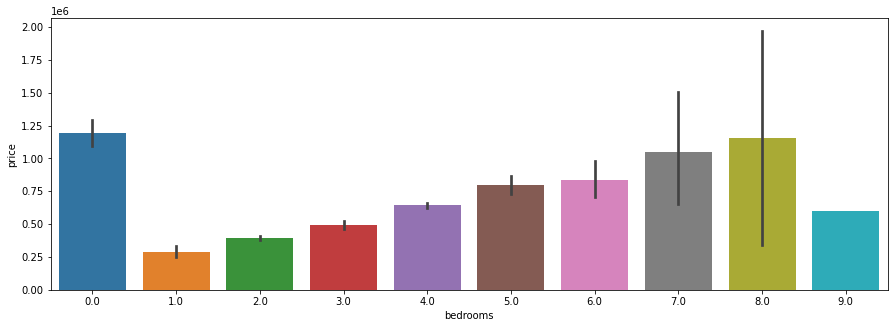

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = df.bedrooms, y = df.price)

In [31]:
# 0 Bedrooms doesnt make sense and 9 bedroom is an outlier
df["bedrooms"].value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64

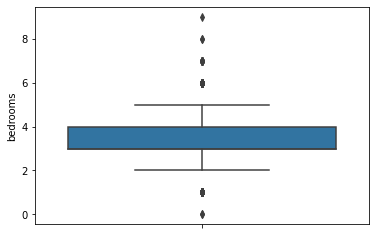

In [32]:
sns.boxplot(y=df["bedrooms"])  #All outliers are not outliers
plt.show()

In [33]:
df = df[(df.bedrooms > 0) & (df.bedrooms < 9)].copy() # Removing 0 Bedroom and 9 Bedroom Home

In [34]:
df["bedrooms"].value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
Name: bedrooms, dtype: int64

### Bathrooms

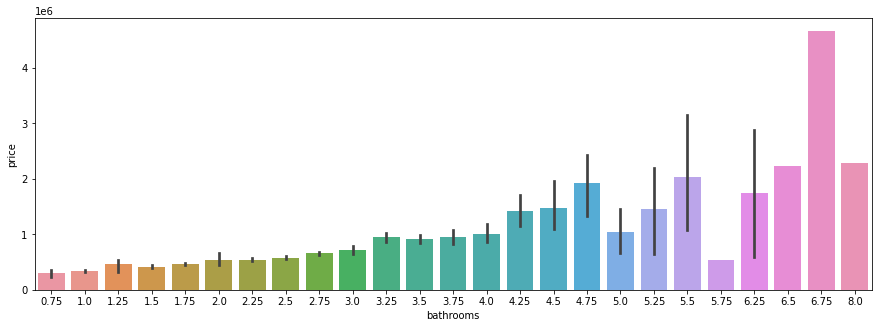

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = df.bathrooms, y = df.price)

### sqft_living,sqft_lot,floors

In [36]:
df[["sqft_living","sqft_lot","floors","sqft_above","sqft_basement","yr_built","yr_renovated"]].describe()

,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
count,4597.000000,4.597000e+03,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,2138.197085,1.485356e+04,1.511312,1826.212095,311.984990,1970.785077,807.826191
std,962.295186,3.589513e+04,0.537419,861.084503,463.975701,29.734917,979.255294
min,370.000000,6.380000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,1460.000000,5.001000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000
50%,1980.000000,7.683000e+03,1.500000,1590.000000,0.000000,1976.000000,0.000000
75%,2620.000000,1.100000e+04,2.000000,2300.000000,610.000000,1997.000000,1999.000000
max,13540.000000,1.074218e+06,3.500000,9410.000000,4820.000000,2014.000000,2014.000000


### Water front

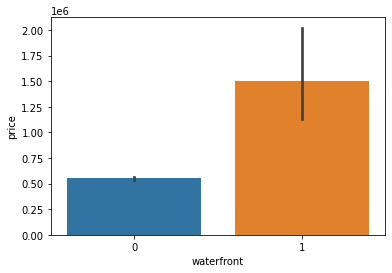

In [37]:
sns.barplot(x = df.waterfront, y = df.price)

### View

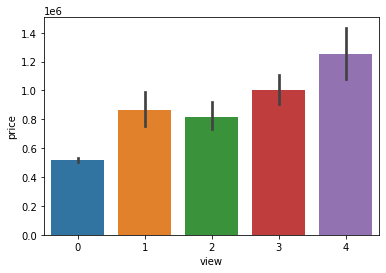

In [38]:
sns.barplot(x = df.view, y = df.price)

### Condition

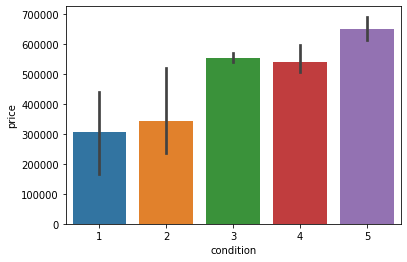

In [39]:
sns.barplot(x = df.condition, y = df.price)

### State ZIP

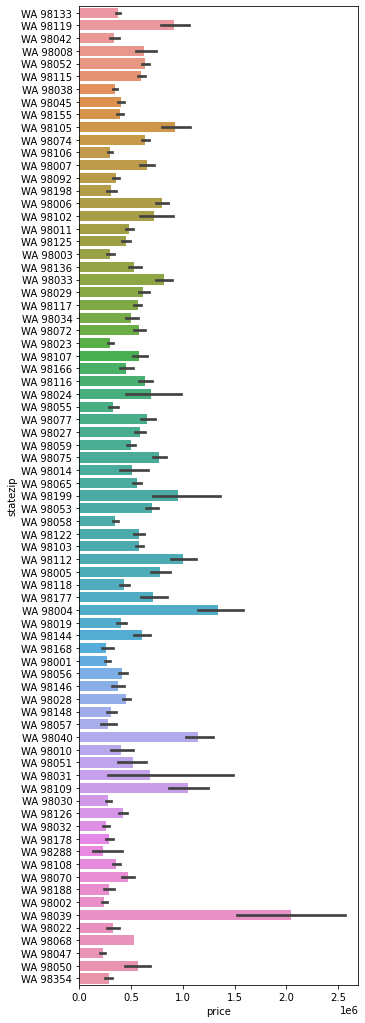

In [40]:
fig, ax = plt.subplots(figsize=(5,18))       #WA 98039
sns.barplot(ax = ax, x = df.price, y = df.statezip)

### Dataset

In [41]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


## 2:Data Integration (We only have one data source)

## 3:Data Transformation 

### Min Max Method

In [42]:
df["bedrooms"]=(df["bedrooms"]-df["bedrooms"].min())/(df["bedrooms"].max()-df["bedrooms"].min())
df["bathrooms"]=(df["bathrooms"]-df["bathrooms"].min())/(df["bathrooms"].max()-df["bathrooms"].min())
df["sqft_living"]=(df["sqft_living"]-df["sqft_living"].min())/(df["sqft_living"].max()-df["sqft_living"].min())
df["sqft_lot"]=(df["sqft_lot"]-df["sqft_lot"].min())/(df["sqft_lot"].max()-df["sqft_lot"].min())
df["floors"]=(df["floors"]-df["floors"].min())/(df["floors"].max()-df["floors"].min())
df["waterfront"]=(df["waterfront"]-df["waterfront"].min())/(df["waterfront"].max()-df["waterfront"].min())
df["view"]=(df["view"]-df["view"].min())/(df["view"].max()-df["view"].min())
df["condition"]=(df["condition"]-df["condition"].min())/(df["condition"].max()-df["condition"].min())
df["sqft_above"]=(df["sqft_above"]-df["sqft_above"].min())/(df["sqft_above"].max()-df["sqft_above"].min())
df["sqft_basement"]=(df["sqft_basement"]-df["sqft_basement"].min())/(df["sqft_basement"].max()-df["sqft_basement"].min())
df["yr_built"]=(df["yr_built"]-df["yr_built"].min())/(df["yr_built"].max()-df["yr_built"].min())
df["yr_renovated"]=(df["yr_renovated"]-df["yr_renovated"].min())/(df["yr_renovated"].max()-df["yr_renovated"].min())

In [43]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,3.130000e+05,0.285714,0.103448,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531,WA 98133
1,2.384000e+06,0.571429,0.241379,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000,WA 98119
2,3.420000e+05,0.285714,0.172414,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000,WA 98042
3,4.200000e+05,0.285714,0.206897,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000,WA 98008
4,5.500000e+05,0.428571,0.241379,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,0.285714,0.137931,0.086560,0.005330,0.0,0.0,0.0,0.75,0.126106,0.000000,0.473684,0.982622,WA 98133
4596,5.343333e+05,0.285714,0.241379,0.082764,0.006460,0.4,0.0,0.0,0.50,0.120575,0.000000,0.728070,0.997517,WA 98007
4597,4.169042e+05,0.285714,0.241379,0.200456,0.005939,0.4,0.0,0.0,0.50,0.292035,0.000000,0.956140,0.000000,WA 98059
4598,2.034000e+05,0.428571,0.172414,0.130600,0.005581,0.0,0.0,0.0,0.50,0.077434,0.211618,0.649123,0.000000,WA 98178


## 4:Data Reduction

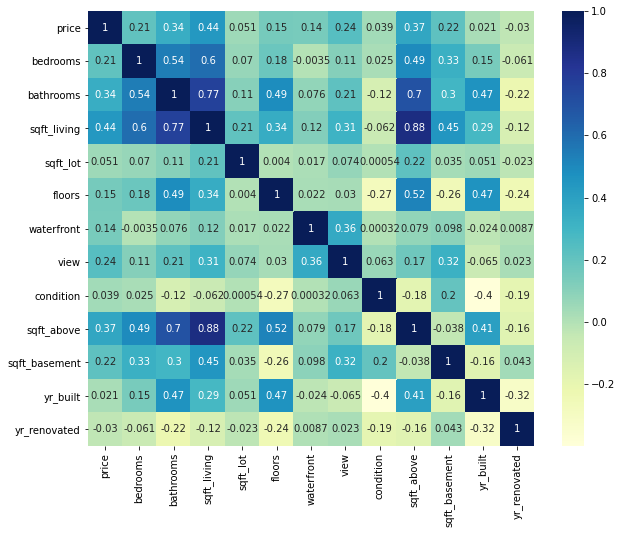

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))   #SqFT Living and SqFT Above are Highly Correlated & SqFT Living and Prices is Highly Correlated that is SqFT Living is important
cor = df.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")

In [45]:
df.drop(['sqft_above'], axis = 1, inplace = True)

In [46]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,0.285714,0.103448,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.482456,0.995531,WA 98133
1,2384000.0,0.571429,0.241379,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,0.000000,WA 98119
2,342000.0,0.285714,0.172414,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.000000,WA 98042
3,420000.0,0.285714,0.206897,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.000000,WA 98008
4,550000.0,0.428571,0.241379,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.666667,0.989076,WA 98052


# Imp-Step: Correcting Data Index

In [47]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip
0,3.130000e+05,0.285714,0.103448,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.482456,0.995531,WA 98133
1,2.384000e+06,0.571429,0.241379,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,0.000000,WA 98119
2,3.420000e+05,0.285714,0.172414,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.000000,WA 98042
3,4.200000e+05,0.285714,0.206897,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.000000,WA 98008
4,5.500000e+05,0.428571,0.241379,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.666667,0.989076,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,0.285714,0.137931,0.086560,0.005330,0.0,0.0,0.0,0.75,0.000000,0.473684,0.982622,WA 98133
4596,5.343333e+05,0.285714,0.241379,0.082764,0.006460,0.4,0.0,0.0,0.50,0.000000,0.728070,0.997517,WA 98007
4597,4.169042e+05,0.285714,0.241379,0.200456,0.005939,0.4,0.0,0.0,0.50,0.000000,0.956140,0.000000,WA 98059
4598,2.034000e+05,0.428571,0.172414,0.130600,0.005581,0.0,0.0,0.0,0.50,0.211618,0.649123,0.000000,WA 98178


In [48]:
df = df.reset_index()

In [49]:
df

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip
0,0,3.130000e+05,0.285714,0.103448,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.482456,0.995531,WA 98133
1,1,2.384000e+06,0.571429,0.241379,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,0.000000,WA 98119
2,2,3.420000e+05,0.285714,0.172414,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.000000,WA 98042
3,3,4.200000e+05,0.285714,0.206897,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.000000,WA 98008
4,4,5.500000e+05,0.428571,0.241379,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.666667,0.989076,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,4595,3.081667e+05,0.285714,0.137931,0.086560,0.005330,0.0,0.0,0.0,0.75,0.000000,0.473684,0.982622,WA 98133
4593,4596,5.343333e+05,0.285714,0.241379,0.082764,0.006460,0.4,0.0,0.0,0.50,0.000000,0.728070,0.997517,WA 98007
4594,4597,4.169042e+05,0.285714,0.241379,0.200456,0.005939,0.4,0.0,0.0,0.50,0.000000,0.956140,0.000000,WA 98059
4595,4598,2.034000e+05,0.428571,0.172414,0.130600,0.005581,0.0,0.0,0.0,0.50,0.211618,0.649123,0.000000,WA 98178


In [50]:
df.drop(['index'], axis = 1, inplace = True)

## 5:Data Discretization

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4597 non-null   float64
 1   bedrooms       4597 non-null   float64
 2   bathrooms      4597 non-null   float64
 3   sqft_living    4597 non-null   float64
 4   sqft_lot       4597 non-null   float64
 5   floors         4597 non-null   float64
 6   waterfront     4597 non-null   float64
 7   view           4597 non-null   float64
 8   condition      4597 non-null   float64
 9   sqft_basement  4597 non-null   float64
 10  yr_built       4597 non-null   float64
 11  yr_renovated   4597 non-null   float64
 12  statezip       4597 non-null   object 
dtypes: float64(12), object(1)
memory usage: 467.0+ KB


### statezip is categorical

In [52]:
df["statezip"].unique()

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105',
       'WA 98074', 'WA 98106', 'WA 98007', 'WA 98092', 'WA 98198',
       'WA 98006', 'WA 98102', 'WA 98011', 'WA 98125', 'WA 98003',
       'WA 98136', 'WA 98033', 'WA 98029', 'WA 98117', 'WA 98034',
       'WA 98072', 'WA 98023', 'WA 98107', 'WA 98166', 'WA 98116',
       'WA 98024', 'WA 98055', 'WA 98077', 'WA 98027', 'WA 98059',
       'WA 98075', 'WA 98014', 'WA 98065', 'WA 98199', 'WA 98053',
       'WA 98058', 'WA 98122', 'WA 98103', 'WA 98112', 'WA 98005',
       'WA 98118', 'WA 98177', 'WA 98004', 'WA 98019', 'WA 98144',
       'WA 98168', 'WA 98001', 'WA 98056', 'WA 98146', 'WA 98028',
       'WA 98148', 'WA 98057', 'WA 98040', 'WA 98010', 'WA 98051',
       'WA 98031', 'WA 98109', 'WA 98030', 'WA 98126', 'WA 98032',
       'WA 98178', 'WA 98288', 'WA 98108', 'WA 98070', 'WA 98188',
       'WA 98002', 'WA 98039', 'WA 98022', 'WA 98068', 'WA 980

In [53]:
len(df["statezip"].unique())  # 77 categorical values

77

## Categorical to Continous

### statezip ==> 1,2,3,4...,77  Using Label Encoding

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [55]:
df['statezip_encoded'] = le.fit_transform(df["statezip"])

In [56]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip,statezip_encoded
0,313000.0,0.285714,0.103448,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.482456,0.995531,WA 98133,62
1,2384000.0,0.571429,0.241379,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,0.000000,WA 98119,58
2,342000.0,0.285714,0.172414,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.000000,WA 98042,26
3,420000.0,0.285714,0.206897,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.000000,WA 98008,7
4,550000.0,0.428571,0.241379,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.666667,0.989076,WA 98052,31


In [57]:
df["statezip_encoded"].unique()

array([62, 58, 26,  7, 31, 54, 23, 27, 67, 48, 42, 49,  6, 45, 73,  5, 46,
        9, 60,  2, 63, 21, 17, 56, 22, 41, 13, 50, 68, 55, 14, 33, 44, 15,
       37, 43, 10, 38, 74, 32, 36, 59, 47, 53,  4, 57, 70,  3, 11, 64, 69,
        0, 34, 65, 16, 66, 35, 25,  8, 30, 19, 52, 18, 61, 20, 71, 75, 51,
       40, 72,  1, 24, 12, 39, 28, 29, 76])

In [58]:
len(df["statezip_encoded"].unique())

77

In [59]:
df.drop(['statezip'], axis = 1, inplace = True)

In [60]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip_encoded
0,313000.0,0.285714,0.103448,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.482456,0.995531,62
1,2384000.0,0.571429,0.241379,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,0.000000,58
2,342000.0,0.285714,0.172414,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.000000,26
3,420000.0,0.285714,0.206897,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.000000,7
4,550000.0,0.428571,0.241379,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.666667,0.989076,31


## 1,2,3,....,77 statezip (Here 77>1 and ML will think its imp) ==> Ordinal Data to One hot encoding

In [61]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

In [62]:
ohc_df = pd.DataFrame(ohc.fit_transform(df[['statezip_encoded']]).toarray())
ohc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
ohc_df.iloc[:,62]

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4592    1.0
4593    0.0
4594    0.0
4595    0.0
4596    0.0
Name: 62, Length: 4597, dtype: float64

In [64]:
df = df.join(ohc_df)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip_encoded,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,313000.0,0.285714,0.103448,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.482456,0.995531,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000.0,0.571429,0.241379,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,0.000000,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.0,0.285714,0.172414,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000.0,0.285714,0.206897,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.000000,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000.0,0.428571,0.241379,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.666667,0.989076,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df.drop(['statezip_encoded'], axis = 1, inplace = True)

In [66]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,...,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,313000.0,0.285714,0.103448,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.482456,0.995531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000.0,0.571429,0.241379,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.0,0.285714,0.172414,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000.0,0.285714,0.206897,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000.0,0.428571,0.241379,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.666667,0.989076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step-6:Training Machine Learning Model

## Making y and X variables for equation y=b1x1+b2x2+.......bnxn+c

In [67]:
y = df["price"]

In [68]:
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [69]:
X = df.iloc[:, 1:]

In [70]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,...,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,0.285714,0.103448,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.482456,0.995531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.571429,0.241379,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.285714,0.172414,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.285714,0.206897,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.428571,0.241379,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.666667,0.989076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting Dataset into Train and Test 95:5 Ratio

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [72]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

4367
4367
230
230


## Linear Regression Model

In [73]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

## Training Linear Regression Model

In [74]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Display Coefficients  y=b1x1+b2x2+.......bnxn+c

In [75]:
lin_reg.intercept_   # C value

-3.2609197626418246e+17

In [76]:
lin_reg.coef_  # b1,b2,b3..............b88

array([-1.72243309e+05,  1.86950701e+05,  3.24351119e+06, -3.95454843e+04,
       -1.76186633e+05,  5.24427599e+05,  2.15157877e+05,  1.31590537e+05,
       -5.50110362e+05,  2.71218595e+04,  1.26606701e+04,  3.26091976e+17,
        3.26091976e+17,  3.26091976e+17,  3.26091976e+17,  3.26091976e+17,
        3.26091976e+17,  3.26091976e+17,  3.26091976e+17,  3.26091976e+17,
        3.26091976e+17,  3.26091976e+17,  3.26091976e+17,  3.26091976e+17,
        3.26091976e+17,  3.26091976e+17,  3.26091976e+17,  3.26091976e+17,
        3.26091976e+17,  3.26091976e+17,  3.26091976e+17,  3.26091976e+17,
        3.26091976e+17,  3.26091976e+17,  3.26091976e+17,  3.26091976e+17,
        3.26091976e+17,  3.26091976e+17,  3.26091976e+17,  3.26091976e+17,
        3.26091976e+17,  3.26091976e+17,  3.26091976e+17,  3.26091976e+17,
        3.26091976e+17,  3.26091976e+17,  3.26091976e+17,  3.26091976e+17,
        3.26091976e+17,  3.26091976e+17,  3.26091976e+17,  3.26091976e+17,
        3.26091976e+17,  

In [77]:
len(lin_reg.coef_)

88

## Accuracy of Model

In [78]:
accuracy = lin_reg.score(X_test,y_test)
print(accuracy*100,'%')

72.36652976944478 %


## Model is ready now lets test it!

In [79]:
info=X_test.iloc[0,:]
print(info)

bedrooms       0.285714
bathrooms      0.034483
sqft_living    0.063022
sqft_lot       0.005227
floors         0.000000
                 ...   
72             0.000000
73             0.000000
74             0.000000
75             0.000000
76             0.000000
Name: 1393, Length: 88, dtype: float64


In [80]:
ans=y_test.iloc[0]
print(ans)

280000.0


### 196416Dollars ~ 280000Dollars

In [81]:
lin_reg.predict([info])

array([196160.])